# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

In this assignment the Iris dataset will be used.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(2 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(3 points)_ **Data inspection.** Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data. Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. First, instantiate the model and then run classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test. Also, comparing these two arrays (predicted classes and test Y) count the numbers of correct predictions and predictions that were wrong. (`NumPy` array can be compared with `==` operator and `NumPy` operator `count_nonzero` counts number of non-False).

9. _(2 points)_ Repeat the fit with **different number of neighbors (1, 3, 5, 10, 20, 50)**. Show how accuracy score and the number of correct predictions change with the number of neighbors.

In [2]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [24]:
cols = ['sepal-length', 'sepal-width','petal-length','petal-width','target']
iris_df = pd.read_csv('iris.data',header=None)
iris_df.columns = cols
iris_df.head()

sepal-length  sepal-width  petal-length  petal-width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>

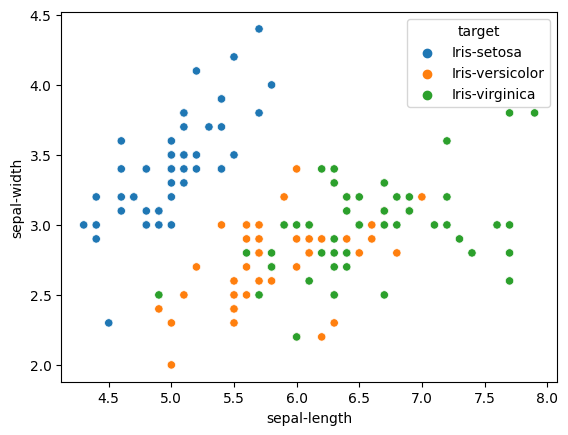

In [25]:

import seaborn as sns
colors = {'Iris-setosa':'r', 'Iris-virginica':'g', 'Iris-versicolor':'b'}

fig, ax = plt.subplots()

sns.scatterplot(data=iris_df, x='sepal-length', y='sepal-width', hue='target')

<AxesSubplot:xlabel='petal-length', ylabel='petal-width'>

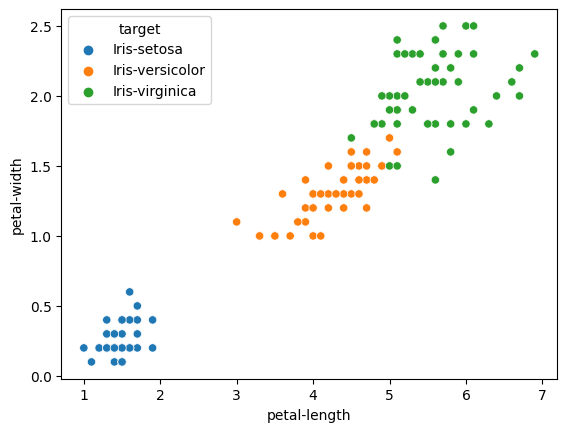

In [26]:

fig2, ax2 = plt.subplots()

sns.scatterplot(data=iris_df, x='petal-length', y='petal-width', hue='target')

In [28]:
v, _ = iris_df.target.factorize()
print(v, _)
iris_df.target=v

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [29]:
y_col = 'target'
data_x = iris_df.drop([y_col], axis=1) # data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
y = iris_df[y_col].astype('int') # data 중 y_col 에 해당하는 Data, y에 할당

X_train, X_test, y_train, y_test = train_test_split(data_x.values, y.values, test_size=0.2, random_state=2020,shuffle=True)


In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:

y_knn = knn.predict(X_test)

print('Accuracy_score : ', np.count_nonzero(y_knn==y_test)/len(y_test))

Accuracy_score :  0.9


In [38]:
neighbors = [1, 3, 5, 10, 20, 50]
score_arr = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_knn = knn.predict(X_test)
    score = np.count_nonzero(y_knn==y_test)/len(y_test)
    print('Accuracy_score : ', score)

    score_arr.append(score)

Accuracy_score :  0.9
Accuracy_score :  0.9
Accuracy_score :  0.9
Accuracy_score :  0.9333333333333333
Accuracy_score :  0.8333333333333334
Accuracy_score :  0.8333333333333334


([<matplotlib.axis.XTick at 0x215b28b47c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

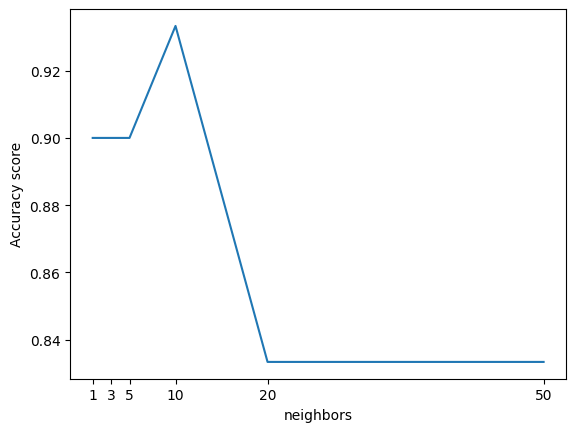

In [43]:
plt.plot(neighbors,score_arr)
plt.xlabel('neighbors')
plt.ylabel('Accuracy score')
plt.xticks(neighbors)